In [1]:
# After spending a bit of time figuring out how pickling files and loading works
# I have finally done it.
import pickle
import sys

class dat:
    datin = "Container of Data"

def load_klf_by_radius(rmin=0, rmax=30, mask_for_log=False):
    pickleFile = '%sklf_r_%.1f_%.1f.dat' % ('/Users/jlu/work/gc/imf/klf/current/', rmin, rmax)
    _in = open(pickleFile, 'rb')
    d = dat()
    d.Kp = pickle.load(_in,encoding='bytes')
    d.N = pickle.load(_in, encoding='bytes')
    d.eN = pickle.load(_in, encoding='bytes')

    d.N_ext = pickle.load(_in, encoding='bytes')
    d.eN_ext = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')

    d.KLF = pickle.load(_in, encoding='bytes')
    d.eKLF = pickle.load(_in, encoding='bytes')

    d.KLF_ext = pickle.load(_in, encoding='bytes')
    d.eKLF_ext = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')

    d.N_noWR = pickle.load(_in, encoding='bytes')
    d.eN_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eN_ext_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_noWR = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_im_noWR = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp_im_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_cmp_sp_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_im_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_cmp_sp_im_noWR = pickle.load(_in, encoding='bytes')

    d.comp_spec_ext = pickle.load(_in, encoding='bytes')
    d.comp_imag_ext = pickle.load(_in, encoding='bytes')

    if mask_for_log:
        # Repair for zeros since we are plotting in semi-log-y
        d.eN = np.ma.masked_where(d.N <= 0, d.eN)
        d.N = np.ma.masked_where(d.N <= 0, d.N)

        d.eN_ext = np.ma.masked_where(d.N_ext <= 0, d.eN_ext)
        d.N_ext = np.ma.masked_where(d.N_ext <= 0, d.N_ext)

        d.eN_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <= 0, 
                                             d.eN_ext_cmp_sp)
        d.N_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <= 0, 
                                            d.N_ext_cmp_sp)

        d.eN_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <= 0, 
                                                d.eN_ext_cmp_sp_im)
        d.N_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <= 0, 
                                               d.N_ext_cmp_sp_im)
        
        d.eKLF = np.ma.masked_where(d.KLF <= 0, d.eKLF)
        d.KLF = np.ma.masked_where(d.KLF <= 0, d.KLF)
        
        d.eKLF_ext = np.ma.masked_where(d.KLF_ext <= 0, d.eKLF_ext)
        d.KLF_ext = np.ma.masked_where(d.KLF_ext <= 0, d.KLF_ext)
        
        d.eKLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                               d.eKLF_ext_cmp_sp)
        d.KLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                              d.KLF_ext_cmp_sp)
        
        d.eKLF_ext_cmp_sp_im = np.ma.masked_where(d.KLF_ext_cmp_sp_im <= 0, 
                                                  d.eKLF_ext_cmp_sp_im)
        d.KLF_ext_cmp_sp_im = np.ma.masked_where(d.KLF_ext_cmp_sp_im <= 0, 
                                                 d.KLF_ext_cmp_sp_im)


    _in.close()

    return d

In [2]:
import numpy as np
result = load_klf_by_radius()
result.KLF_ext_cmp_sp_im_noWR
magBin = result.Kp[1] - result.Kp[0]
idx = np.where(result.Kp < 16)[0]

Now, introducing the BPASS Cluster.

In [3]:
from spisea import synthetic
BPASS_iso = synthetic.Isochrone_Binary(6.78, 2.7, 8000, 0.0, filters=['nirc2,Kp'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to logg=3.50 for T= 26935 logg=3.29
Changing to T= 50000 for T= 50518 logg=3.84
Changing to logg=5.00 for T= 50518 logg=3.84
Changing to T= 50000 for T=168628 logg=5.83
Changing to logg=5.00 for T=168628 logg=5.83
Changing to logg=3.50 for T= 27821 logg=3.39
Changing to T= 50000 for T=166073 logg=5.80
Changing to logg=5.00 for T=166073 logg=5.80
Changing to T= 50000 for T=162596 logg=5.78
Changing to logg=5.00 for T=162596 logg=5.78
Changing to logg=3.00 for T= 23226 logg=2.95
Changing to T= 50000 for T=169071 logg=5.83
Changing to logg=5.00 for T=169071 logg=5.83
Changing to T= 50000 for T=166855 logg=5.80
Changing to logg=5.00 for T=166855 logg=5.80
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=143840 logg=5.56
Changing to logg=5.00 for T=143840 logg=5.56
Changing to T= 50000 for T=113794 logg=5.39
Changing to logg=5.00 for T=113794 logg=5.39
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.

Changing to T= 50000 for T=113941 logg=5.39
Changing to logg=5.00 for T=113941 logg=5.39
Changing to T= 50000 for T=142249 logg=5.54
Changing to logg=5.00 for T=142249 logg=5.54
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=4.00 for T= 34990 logg=3.71
Changing to T= 50000 for T=138685 logg=5.50
Changing to logg=5.00 for T=138685 logg=5.50
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to T= 50000 for T=143407 logg=5.56
Changing to logg=5.00 for T=143407 logg=5.56
Changing to T= 50000 for T=143632 logg=5.56
Changing to logg=5.00 for T=143632 logg=5.56
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=143863 logg=5.56
Changing to logg=

Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=114296 logg=5.39
Changing to logg=5.00 for T=114296 logg=5.39
Changing to T= 50000 for T=130242 logg=5.40
Changing to logg=5.00 for T=130242 logg=5.40
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to T= 50000 for T=140883 logg=5.53
Changing to logg=5.00 for T=140883 logg=5.53
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to logg=3.50 for T= 28403 logg=3.48
Changing to T= 50000 for T=128869 logg=5.38
Changing to logg=5.00 for T=128869 logg=5.38
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=142939 logg=5.55
Changing to logg=

Changing to T= 50000 for T=171878 logg=5.85
Changing to logg=5.00 for T=171878 logg=5.85
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=113794 logg=5.38
Changing to logg=5.00 for T=113794 logg=5.38
Changing to logg=4.00 for T= 37720 logg=3.84
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=173010 logg=5.87
Changing to logg=5.00 for T=173010 logg=5.87
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=173014 logg=5.86
Changing to logg=5.00 for T=173014 logg=5.86
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to T= 50000 for T=176405 logg=5.89
Changing to logg=5.00 for T=176405 logg=5.89
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=142180 logg=5.54
Changing to logg=5.00 for T=142180 logg=5.54
Changing to logg=

Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.00 for T= 22903 logg=2.75
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=171648 logg=5.85
Changing to logg=5.00 for T=171648 logg=5.85
Changing to T= 50000 for T=140556 logg=5.53
Changing to logg=5.00 for T=140556 logg=5.53
Changing to T= 50000 for T=113616 logg=5.38
Changing to logg=5.00 for T=113616 logg=5.38
Changing to logg=4.50 for T= 44832 logg=3.62
Changing to logg=3.50 for T= 29252 logg=3.49
Changing to T= 50000 for T=141449 logg=5.54
Changing to logg=5.00 for T=141449 logg=5.54
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=4.00 for T= 32415 logg=3.40
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 26836 logg=3.29
Changing to T= 50000 for T=114120 logg=5.39
Changing to logg=5.00 for T=114120 logg=5.39
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to log

Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to T= 50000 for T=139268 logg=5.51
Changing to logg=5.00 for T=139268 logg=5.51
Changing to logg=3.50 for T= 27699 logg=3.38
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=2.50 for T= 16750 logg=2.11
Changing to T= 50000 for T=131586 logg=5.41
Changing to logg=5.00 for T=131586 logg=5.41
Changing to T= 50000 for T=172326 logg=5.86
Changing to logg=5.00 for T=172326 logg=5.86
Changing to T= 50000 for T=114251 logg=5.39
Changing to logg=5.00 for T=114251 logg=5.39
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=110507 logg=5.40
Changing to logg=5.00 for T=110507 logg=5.40
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to logg

Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=4.00 for T= 35206 logg=3.99
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.00 for T= 22769 logg=2.88
Changing to logg=4.00 for T= 34694 logg=3.46
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to T= 50000 for T=160313 logg=5.74
Changing to logg=5.00 for T=160313 logg=5.74
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to T= 50000 for T=114456 logg=5.39
Changing to logg=5.00 for T=114456 logg=5.39
Changing to T= 50000 for T=171676 logg=5.85
Changing to logg=5.00 for T=171676 logg=5.85
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 26250 logg=3.24
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to l

Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=143724 logg=5.56
Changing to logg=5.00 for T=143724 logg=5.56
Changing to logg=5.00 for T= 49363 logg=3.80
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=113642 logg=5.38
Changing to logg=5.00 for T=113642 logg=5.38
Changing to logg=3.50 for T= 27382 logg=3.36
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to logg=2.50 for T= 18143 logg=2.19
Changing to logg=3.50 for T= 28471 logg=3.47
Changing to T= 50000 for T=114317 logg=5.39
Changing to logg=5.00 for T=114317 logg=5.39
Changing to T= 50000 for T=131247 logg=5.40
Changing to logg=5.00 for T=131247 logg=5.40
Changing to T= 50000 for T=142883 logg=5.55
Changing to logg=5.00 for T=142883 logg=5.55
Changing to logg=3.00 for T= 22462 logg=2.87
Changing to logg=4.00 for T= 34409 logg=3.89
Changing to logg=3.50 for T= 27428 logg=3.36
Changing to T= 50000 for T=135201 logg=5.48
Changing to logg

Changing to logg=4.00 for T= 31171 logg=4.00
Changing to logg=4.00 for T= 32402 logg=3.91
Changing to logg=4.00 for T= 31953 logg=3.81
Changing to T= 50000 for T=120654 logg=5.27
Changing to logg=5.00 for T=120654 logg=5.27
Changing to logg=4.00 for T= 32715 logg=3.85
Changing to logg=4.00 for T= 31283 logg=3.68
Changing to T= 50000 for T=169134 logg=5.83
Changing to logg=5.00 for T=169134 logg=5.83
Changing to T= 50000 for T=113204 logg=5.38
Changing to logg=5.00 for T=113204 logg=5.38
Changing to logg=5.00 for T=  1500 logg=4.44
Changing to T=  1200 for T=   808 logg=4.44
Changing to T=  1200 for T=   692 logg=4.44
Changing to logg=4.00 for T= 31846 logg=3.92
Changing to T= 50000 for T=111830 logg=5.39
Changing to logg=5.00 for T=111830 logg=5.39
Changing to T= 50000 for T=112673 logg=5.39
Changing to logg=5.00 for T=112673 logg=5.39
Changing to logg=3.50 for T= 28026 logg=3.29
Changing to logg=5.00 for T= 49783 logg=3.81
Changing to logg=4.00 for T= 31935 logg=3.96
Changing to logg=

Changing to T= 50000 for T=109527 logg=5.39
Changing to logg=5.00 for T=109527 logg=5.39
Changing to logg=4.00 for T= 32172 logg=3.84
Changing to T= 50000 for T=113222 logg=5.39
Changing to logg=5.00 for T=113222 logg=5.39
Changing to T= 50000 for T=107594 logg=5.04
Changing to logg=5.00 for T=107594 logg=5.04
Changing to T= 50000 for T=169134 logg=5.83
Changing to logg=5.00 for T=169134 logg=5.83
Changing to logg=4.00 for T= 31171 logg=4.00
Changing to logg=4.00 for T= 31935 logg=3.96
Changing to T= 50000 for T=120695 logg=5.26
Changing to logg=5.00 for T=120695 logg=5.26
Changing to logg=3.50 for T= 28424 logg=3.44
Changing to logg=4.00 for T= 31953 logg=3.81
Changing to logg=4.00 for T= 32024 logg=3.91
Changing to logg=4.00 for T= 31566 logg=3.99
Changing to logg=4.00 for T= 31820 logg=3.95
Changing to T= 50000 for T=112946 logg=5.38
Changing to logg=5.00 for T=112946 logg=5.38
Changing to logg=3.50 for T= 29637 logg=3.48
Changing to logg=3.50 for T= 27397 logg=3.35
Changing to logg

Changing to logg=3.50 for T= 26812 logg=3.18
Changing to T= 50000 for T=110441 logg=5.15
Changing to logg=5.00 for T=110441 logg=5.15
Changing to logg=3.50 for T= 28424 logg=3.44
Changing to logg=4.00 for T= 31283 logg=3.68
Changing to logg=4.00 for T= 31935 logg=3.96
Changing to T= 50000 for T=112805 logg=5.39
Changing to logg=5.00 for T=112805 logg=5.39
Changing to logg=4.00 for T= 32541 logg=3.84
Changing to logg=5.00 for T=  1616 logg=4.44
Changing to logg=4.00 for T= 31940 logg=3.82
Changing to T=  1200 for T=   750 logg=4.44
Changing to logg=4.00 for T= 31559 logg=3.62
Changing to logg=4.00 for T= 31791 logg=3.76
Changing to T=  1200 for T=   692 logg=4.44
Changing to logg=4.00 for T= 31846 logg=3.92
Changing to logg=5.00 for T=  1616 logg=4.44
Changing to logg=4.00 for T= 31171 logg=4.00
Changing to T= 50000 for T=100962 logg=5.46
Changing to logg=5.00 for T=100962 logg=5.46
Changing to T= 50000 for T=120940 logg=5.26
Changing to logg=5.00 for T=120940 logg=5.26
Changing to T=  

Changing to T= 50000 for T=132260 logg=5.42
Changing to logg=5.00 for T=132260 logg=5.42
Changing to logg=4.00 for T= 32022 logg=3.86
Changing to logg=3.50 for T= 27281 logg=3.32
Changing to logg=4.00 for T= 31444 logg=3.99
Changing to logg=4.00 for T= 32024 logg=3.91
Changing to T= 50000 for T=123441 logg=5.30
Changing to logg=5.00 for T=123441 logg=5.30
Changing to logg=4.00 for T= 31827 logg=3.99
Changing to logg=4.00 for T= 31171 logg=4.00
Changing to T= 50000 for T=120740 logg=5.26
Changing to logg=5.00 for T=120740 logg=5.26
Changing to T= 50000 for T=120862 logg=5.27
Changing to logg=5.00 for T=120862 logg=5.27
Changing to T=  1200 for T=   808 logg=4.44
Changing to logg=3.50 for T= 27281 logg=3.32
Changing to logg=4.00 for T= 31283 logg=3.68
Changing to logg=3.50 for T= 28179 logg=3.14
Changing to logg=4.00 for T= 31566 logg=3.99
Changing to T=  1200 for T=   750 logg=4.44
Changing to logg=4.00 for T= 32402 logg=3.91
Changing to T= 50000 for T=169134 logg=5.83
Changing to logg=

Changing to T= 50000 for T=112663 logg=5.38
Changing to logg=5.00 for T=112663 logg=5.38
Changing to logg=4.00 for T= 31793 logg=3.76
Changing to logg=4.00 for T= 32402 logg=3.91
Changing to logg=3.50 for T= 27281 logg=3.32
Changing to logg=3.50 for T= 27281 logg=3.32
Changing to logg=3.50 for T= 27397 logg=3.35
Changing to logg=3.50 for T= 27281 logg=3.32
Changing to logg=4.00 for T= 31953 logg=3.81
Changing to logg=4.00 for T= 31640 logg=3.75
Changing to logg=4.00 for T= 32172 logg=3.84
Changing to logg=4.00 for T= 31846 logg=3.92
Changing to logg=3.50 for T= 27397 logg=3.35
Changing to logg=4.00 for T= 32034 logg=3.94
Changing to logg=3.50 for T= 29358 logg=3.47
Changing to logg=4.00 for T= 33130 logg=3.86
Changing to logg=3.50 for T= 28424 logg=3.44
Changing to logg=5.00 for T= 49783 logg=3.81
Changing to logg=3.50 for T= 26555 logg=3.26
Changing to logg=3.50 for T= 26426 logg=3.28
Changing to logg=5.00 for T=  1616 logg=4.44
Changing to logg=3.50 for T= 27397 logg=3.35
Changing to

M =  11.000 Msun  T = 25256 K  m_nirc2_Kp = 15.42
M =  15.000 Msun  T = 28732 K  m_nirc2_Kp = 14.62
M =  20.700 Msun  T = 31791 K  m_nirc2_Kp = 13.58
M =   0.960 Msun  T =  5540 K  m_nirc2_Kp = 20.67
M =   0.980 Msun  T =  5655 K  m_nirc2_Kp = 20.62
M =  12.000 Msun  T = 27889 K  m_nirc2_Kp = 15.40
M =  11.200 Msun  T =   nan K  m_nirc2_Kp =  nan
M =  20.700 Msun  T = 31791 K  m_nirc2_Kp = 13.58
M =  15.000 Msun  T = 28732 K  m_nirc2_Kp = 14.62
M =  30.000 Msun  T = 113092 K  m_nirc2_Kp = 18.02
M =  18.000 Msun  T = 29019 K  m_nirc2_Kp = 13.94
M =   7.200 Msun  T = 21244 K  m_nirc2_Kp = 16.54
M =  14.400 Msun  T = 30092 K  m_nirc2_Kp = 14.84
M =  21.000 Msun  T = 29443 K  m_nirc2_Kp = 13.31
M =   0.140 Msun  T =   808 K  m_nirc2_Kp = 27.79
M =   3.400 Msun  T = 13359 K  m_nirc2_Kp = 18.01
M =   7.600 Msun  T = 21902 K  m_nirc2_Kp = 16.43
M =  14.000 Msun  T = 27852 K  m_nirc2_Kp = 14.74
M =   6.000 Msun  T = 19094 K  m_nirc2_Kp = 16.91
M =   1.800 Msun  T =  8304 K  m_nirc2_Kp = 19.22


In [4]:
from spisea import imf, ifmr
import numpy as np
custom_IMF = imf.imf.IMF_broken_powerlaw(np.array([1, 200]), np.array([-1.7]),
                                         multiplicity=imf.multiplicity.MultiplicityResolvedDK())
import time
t1 = time.time()
BPASS_Cluster = synthetic.Binary_Cluster(BPASS_iso, custom_IMF, 170000, ifmr=ifmr.IFMR_Spera15())
t2 = time.time()
t_time = t2 - t1

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


In [5]:
print(t_time)

63.281888008117676


In [6]:
area = 116.098  # arcsec^2
scaleFactorBPS = (170000/ BPASS_Cluster.star_systems['systemMass'].sum()) / area
print(scaleFactorBPS)

0.016162004777529878


[ 9.5 10.5 11.5 12.5 13.5 14.5 15.5]
[0.016162 0.016162 0.016162 ... 0.016162 0.016162 0.016162]
0.96


Text(0.5, 1.0, 'Age = 6 Myr')

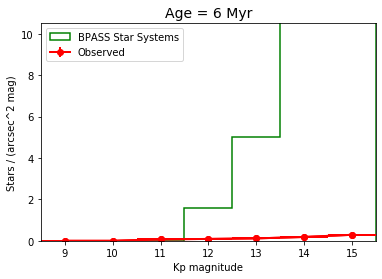

In [7]:
import matplotlib.pyplot as py
# Primary star fluxes
klf_mag_bins = np.arange(9.0, 17, 1.0)
prim_stars = []
binsKp = klf_mag_bins
binEdges = binsKp[0:-1] + (binsKp[1:] - binsKp[0:-1]) / 2.0
print(binEdges)

totl =(BPASS_Cluster.star_systems['m_nirc2_Kp'][np.where((~BPASS_Cluster.star_systems['isWR']) & 
                                                         (BPASS_Cluster.star_systems['m_nirc2_Kp'] <= 15.5))[0]])
weightsBPS = np.array([1.0 for x in totl])
weightsBPS *= scaleFactorBPS
print(weightsBPS)
print(BPASS_Cluster.companions['mass'].min())
(n1, b1, p1) = py.hist(totl, bins=binEdges, weights=weightsBPS,histtype='step', color='green',
                       label='BPASS Star Systems', align='mid',
                       linewidth=1.5)
# py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx], fmt='ro-',
            # xerr=magBin/2.0, capsize=0, linewidth=2)
# py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx], fmt='ro-',
            # yerr=result.eKLF_ext_cmp_sp_im_noWR[idx], linewidth=2,
            # label='Observed')
py.errorbar(result.Kp[idx],
            result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', xerr=magBin/2.0, linewidth=2)
py.errorbar(result.Kp[idx],result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
            label='Observed')
py.legend(loc='upper left', numpoints=1)
py.ylim(0, 10.5)
py.xlim(8.5, 15.5)
py.xlabel('Kp magnitude')
py.ylabel('Stars / (arcsec^2 mag)')
py.title('Age = %d Myr' % (10**(6.78 - 6)), fontsize=14)

In [8]:
MIST_iso = synthetic.IsochronePhot(6.78, 2.7, 8000, 0.0, min_mass = 1.0, max_mass = 150,filters=['nirc2,Kp'])
MIST_Cluster = synthetic.ResolvedCluster(MIST_iso, custom_IMF, 170000, ifmr=ifmr.IFMR_Spera15())

Found 635 companions out of stellar mass range


13.540088070170741
14.986549931059365
14.079511115426442
12.619340797798522
14.541043014503934
12.240345070028788
15.124581490147706
13.877653250675673
14.471569930739644
13.818984680814289
12.869592387990725
13.877653250675673
12.467933409146628
12.68215573328698
14.203563264421328
12.869592387990725
14.152850072247285
13.725564076946606
14.128139059992835
14.378184095914186
15.324301743920536
14.354601416992432
14.128139059992835
14.986549931059365
12.240345070028788
15.124581490147706
13.094881652443938
14.192017951547713
14.070885931709054
13.459347804152504
12.467933409146628
14.986549931059365
14.553947224203089
13.725564076946606
12.240345070028788
15.124581490147706
13.412118450811938
14.581085998317606
13.877653250675673
14.197775735422496
14.553947224203089
14.471569930739644
14.070885931709054
13.656908414556352
14.986549931059365
13.593664472232232
15.124581490147706
13.094881652443938
15.124581490147706
13.877653250675673
15.13368614558663
14.070885931709054
14.98654993105

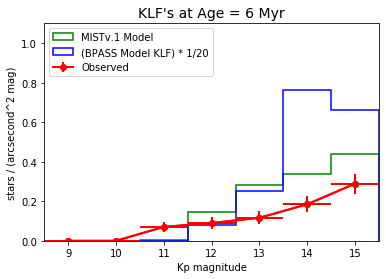

In [9]:
import matplotlib.pyplot as py
# Primary star fluxes
klf_mag_bins = np.arange(9.0, 17, 1.0)
prim_stars = []
binsKp = klf_mag_bins
binEdges = binsKp[0:-1] + (binsKp[1:] - binsKp[0:-1]) / 2.0
area = 116.098  # arcsec^2
mist_scale = (17000/ MIST_Cluster.star_systems['systemMass'].sum()) / area
totl2 = MIST_Cluster.star_systems['m_nirc2_Kp'][np.where(MIST_Cluster.star_systems['m_nirc2_Kp'] <= 15.5)[0]]
weightsMST = np.array([1.0 for x in totl2])
weightsMST *= mist_scale
# Binning
binnd_tot1 = np.digitize(totl, binEdges)
binnd_tot2 = np.digitize(totl2, binEdges)
count1 = [0 for x in range(len(binEdges))]
count2 = [0 for x in range(len(binEdges))]
for x in range(len(binnd_tot1)):
    if not (binnd_tot1[x] >= len(count1) or binnd_tot1[x] <= 0):
        print(totl[x])
        count1[binnd_tot1[x]-1] += 1
    
for x in range(len(binnd_tot2)):
    if not (binnd_tot2[x] > len(count2) or binnd_tot2[x] <= 0):
        count2[binnd_tot2[x]-1] += 1
binnd_tot2 = weightsMST * binnd_tot2

py.hist(totl2, bins=binEdges, histtype='step',
        weights=weightsMST, color='green', label='MISTv.1 Model',
        align='mid', linewidth=1.5)
py.hist(totl, bins=binEdges, histtype='step',
        weights=weightsBPS/20, color='blue', label='(BPASS Model KLF) * 1/20',
        align='mid', linewidth=1.5)
py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx], fmt='ro-', 
                xerr=magBin/2.0, capsize=0, linewidth=2)
py.errorbar(result.Kp[idx],result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
       label='Observed')
py.ylim(0, 1.1)
py.xlim(8.5, 15.5)
py.xlabel('Kp magnitude')
py.ylabel("stars / (arcsecond^2 mag)")
py.title("KLF's at Age = %d Myr" % (10**(6.78 - 6)), fontsize=14)
py.legend(loc='upper left', numpoints=1)

In [10]:
np.unique(MIST_Cluster.star_systems['isWR'][np.where(np.isfinite(MIST_Cluster.star_systems['isWR']))[0]])

0.0


In [11]:
np.where(MIST_iso.points['isWR'])[0]

array([], dtype=int64)

In [12]:
MIST_iso.points['isWR']

False
False
False
False
False
False
False
False
False
False
False


In [13]:
import numpy as np
np.digitize([12, 123, 123, 123,123, 0, 10], np.arange(9, 17, 2.0))

array([2, 4, 4, 4, 4, 0, 1])

In [14]:
np.arange(9, 17, 2.0)

array([ 9., 11., 13., 15.])

In [15]:
binEdges

array([ 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5])

In [16]:
klf_mag_bins

array([ 9., 10., 11., 12., 13., 14., 15., 16.])

In [17]:
print(count1)

[0, 0, 98, 309, 943, 821, 0]


In [18]:
np.where(BPASS_Cluster.star_systems['isWR'])

(array([   15,    16,    18,    47,    48,    67,    70,    78,   110,
          115,   120,   138,   139,   169,   174,   195,   197,   211,
          215,   229,   241,   267,   276,   296,   300,   324,   339,
          341,   351,   372,   373,   374,   386,   417,   439,   447,
          489,   522,   567,   577,   579,   586,   607,   630,   631,
          637,   656,   671,   685,   692,   693,   718,   724,   744,
          747,   749,   750,   802,   831,   878,   919,   942,   945,
          954,   973,   975,   976,  1039,  1048,  1061,  1065,  1076,
         1090,  1095,  1101,  1116,  1124,  1166,  1168,  1180,  1183,
         1192,  1195,  1209,  1253,  1260,  1263,  1286,  1295,  1308,
         1323,  1328,  1338,  1362,  1364,  1366,  1374,  1378,  1410,
         1411,  1417,  1420,  1475,  1489,  1510,  1526,  1534,  1537,
         1538,  1542,  1556,  1557,  1560,  1584,  1598,  1609,  1615,
         1631,  1639,  1668,  1672,  1680,  1704,  1735,  1736,  1740,
      

In [19]:
np.where(MIST_Cluster.star_systems['isWR'])

(array([   2,   22,   34,   35,   51,   73,  106,  107,  133,  136,  150,
         169,  173,  237,  244,  251,  261,  266,  326,  337,  338,  358,
         424,  442,  463,  509,  514,  525,  546,  551,  598,  602,  622,
         638,  645,  695,  698,  706,  707,  747,  763,  772,  775,  782,
         819,  824,  860,  878,  882,  894,  911,  922,  937,  942,  959,
         967,  972,  994,  998, 1016, 1028, 1048, 1054, 1056, 1065, 1077,
        1079, 1087, 1099, 1182, 1185, 1221, 1230, 1232, 1242, 1253, 1266,
        1270, 1271, 1292, 1316, 1318, 1322, 1329, 1339, 1365, 1371, 1393,
        1461, 1474, 1478, 1489, 1492, 1514, 1519, 1521, 1538, 1579, 1597,
        1606, 1607, 1623, 1624, 1642, 1650, 1666, 1673, 1678, 1679, 1696,
        1708, 1716, 1734, 1764, 1791, 1792, 1820, 1821, 1867, 1870, 1873,
        1878, 1916, 1922, 1929, 1939, 1945, 1946, 1958, 1984, 1985, 2017,
        2037, 2041, 2042, 2043, 2097, 2111, 2128, 2167, 2220, 2228, 2234,
        2254, 2293, 2316, 2341, 2381, 

In [20]:
(len(MIST_Cluster.star_systems['isWR']) + len(MIST_Cluster.companions['isWR']))/MIST_Cluster.star_systems['systemMass'].sum()

0.09398802349326182

In [21]:
(len(BPASS_Cluster.star_systems['isWR']) + len(BPASS_Cluster.companions['isWR']))/BPASS_Cluster.star_systems['systemMass'].sum()

0.2697898182039003

In [22]:
len(MIST_Cluster.companions['isWR'])/MIST_Cluster.star_systems['systemMass'].sum()

0.03717050447201912